## Гистограмма, популярность/длинна композиции


#### Import libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#### Считываем csvшник

In [2]:
soundframe = pd.read_csv('dataset.csv')

### Делаем то что делал Феликс(проверяю все ли в поряде с csvшником)

In [3]:
soundframe.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
soundframe.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
soundframe['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [6]:
sf_acoustic = soundframe[soundframe['track_genre'] == 'acoustic']
sf_afrobeat = soundframe[soundframe['track_genre'] == 'afrobeat']
sf_alt_rock = soundframe[soundframe['track_genre'] == 'alt-rock']
sf_alternative = soundframe[soundframe['track_genre'] == 'alternative']
sf_ambient = soundframe[soundframe['track_genre'] == 'ambient']
sf_anime = soundframe[soundframe['track_genre'] == 'anime']
sf_black_metal = soundframe[soundframe['track_genre'] == 'black-metal']
sf_bluegrass = soundframe[soundframe['track_genre'] == 'bluegrass']
sf_blues = soundframe[soundframe['track_genre'] == 'blues']
sf_brazil = soundframe[soundframe['track_genre'] == 'brazil']
sf_breakbeat = soundframe[soundframe['track_genre'] == 'breakbeat']
sf_british = soundframe[soundframe['track_genre'] == 'british']
sf_cantopop = soundframe[soundframe['track_genre'] == 'cantopop']
sf_chicago_house = soundframe[soundframe['track_genre'] == 'chicago-house']
sf_children = soundframe[soundframe['track_genre'] == 'children']
sf_chill = soundframe[soundframe['track_genre'] == 'chill']
sf_classical = soundframe[soundframe['track_genre'] == 'classical']
sf_club = soundframe[soundframe['track_genre'] == 'club']
sf_comedy = soundframe[soundframe['track_genre'] == 'comedy']
sf_country = soundframe[soundframe['track_genre'] == 'country']
sf_dance = soundframe[soundframe['track_genre'] == 'dance']
sf_dancehall = soundframe[soundframe['track_genre'] == 'dancehall']
sf_death_metal = soundframe[soundframe['track_genre'] == 'death-metal']
sf_deep_house = soundframe[soundframe['track_genre'] == 'deep-house']
sf_detroit_techno = soundframe[soundframe['track_genre'] == 'detroit-techno']
sf_disco = soundframe[soundframe['track_genre'] == 'disco']
sf_disney = soundframe[soundframe['track_genre'] == 'disney']
sf_drum_and_bass = soundframe[soundframe['track_genre'] == 'drum-and-bass']
sf_dub = soundframe[soundframe['track_genre'] == 'dub']
sf_dubstep = soundframe[soundframe['track_genre'] == 'dubstep']
sf_edm = soundframe[soundframe['track_genre'] == 'edm']
sf_electro = soundframe[soundframe['track_genre'] == 'electro']
sf_electronic = soundframe[soundframe['track_genre'] == 'electronic']
sf_emo = soundframe[soundframe['track_genre'] == 'emo']
sf_folk = soundframe[soundframe['track_genre'] == 'folk']
sf_forro = soundframe[soundframe['track_genre'] == 'forro']
sf_french = soundframe[soundframe['track_genre'] == 'french']
sf_funk = soundframe[soundframe['track_genre'] == 'funk']
sf_garage = soundframe[soundframe['track_genre'] == 'garage']
sf_german = soundframe[soundframe['track_genre'] == 'german']
sf_gospel = soundframe[soundframe['track_genre'] == 'gospel']
sf_goth = soundframe[soundframe['track_genre'] == 'goth']
sf_grindcore = soundframe[soundframe['track_genre'] == 'grindcore']
sf_groove = soundframe[soundframe['track_genre'] == 'groove']
sf_grunge = soundframe[soundframe['track_genre'] == 'grunge']
sf_guitar = soundframe[soundframe['track_genre'] == 'guitar']
sf_happy = soundframe[soundframe['track_genre'] == 'happy']
sf_hard_rock = soundframe[soundframe['track_genre'] == 'hard-rock']
sf_hardcore = soundframe[soundframe['track_genre'] == 'hardcore']
sf_hardstyle = soundframe[soundframe['track_genre'] == 'hardstyle']
sf_heavy_metal = soundframe[soundframe['track_genre'] == 'heavy-metal']
sf_hip_hop = soundframe[soundframe['track_genre'] == 'hip-hop']
sf_honky_tonk = soundframe[soundframe['track_genre'] == 'honky-tonk']
sf_house = soundframe[soundframe['track_genre'] == 'house']
sf_idm = soundframe[soundframe['track_genre'] == 'idm']
sf_indian = soundframe[soundframe['track_genre'] == 'indian']
sf_indie_pop = soundframe[soundframe['track_genre'] == 'indie-pop']
sf_indie = soundframe[soundframe['track_genre'] == 'indie']
sf_industrial = soundframe[soundframe['track_genre'] == 'industrial']
sf_iranian = soundframe[soundframe['track_genre'] == 'iranian']
sf_j_dance = soundframe[soundframe['track_genre'] == 'j-dance']
sf_j_idol = soundframe[soundframe['track_genre'] == 'j-idol']
sf_j_pop = soundframe[soundframe['track_genre'] == 'j-pop']
sf_j_rock = soundframe[soundframe['track_genre'] == 'j-rock']
sf_jazz = soundframe[soundframe['track_genre'] == 'jazz']
sf_k_pop = soundframe[soundframe['track_genre'] == 'k-pop']
sf_kids = soundframe[soundframe['track_genre'] == 'kids']
sf_latin = soundframe[soundframe['track_genre'] == 'latin']
sf_latino = soundframe[soundframe['track_genre'] == 'latino']
sf_malay = soundframe[soundframe['track_genre'] == 'malay']
sf_mandopop = soundframe[soundframe['track_genre'] == 'mandopop']
sf_metal = soundframe[soundframe['track_genre'] == 'metal']
sf_metalcore = soundframe[soundframe['track_genre'] == 'metalcore']
sf_minimal_techno = soundframe[soundframe['track_genre'] == 'minimal-techno']
sf_mpb = soundframe[soundframe['track_genre'] == 'mpb']
sf_new_age = soundframe[soundframe['track_genre'] == 'new-age']
sf_opera = soundframe[soundframe['track_genre'] == 'opera']
sf_pagode = soundframe[soundframe['track_genre'] == 'pagode']
sf_party = soundframe[soundframe['track_genre'] == 'party']
sf_piano = soundframe[soundframe['track_genre'] == 'piano']
sf_pop_film = soundframe[soundframe['track_genre'] == 'pop-film']
sf_pop = soundframe[soundframe['track_genre'] == 'pop']
sf_power_pop = soundframe[soundframe['track_genre'] == 'power-pop']
sf_progressive_house = soundframe[soundframe['track_genre'] == 'progressive-house']
sf_psych_rock = soundframe[soundframe['track_genre'] == 'psych-rock']
sf_punk_rock = soundframe[soundframe['track_genre'] == 'punk-rock']
sf_punk = soundframe[soundframe['track_genre'] == 'punk']
sf_r_n_b = soundframe[soundframe['track_genre'] == 'r-n-b']
sf_reggae = soundframe[soundframe['track_genre'] == 'reggae']
sf_reggaeton = soundframe[soundframe['track_genre'] == 'reggaeton']
sf_rock_n_roll = soundframe[soundframe['track_genre'] == 'rock-n-roll']
sf_rock = soundframe[soundframe['track_genre'] == 'rock']
sf_rockabilly = soundframe[soundframe['track_genre'] == 'rockabilly']
sf_romance = soundframe[soundframe['track_genre'] == 'romance']
sf_sad = soundframe[soundframe['track_genre'] == 'sad']
sf_salsa = soundframe[soundframe['track_genre'] == 'salsa']
sf_samba = soundframe[soundframe['track_genre'] == 'samba']
sf_sertanejo = soundframe[soundframe['track_genre'] == 'sertanejo']
sf_show_tunes = soundframe[soundframe['track_genre'] == 'show-tunes']
sf_singer_songwriter = soundframe[soundframe['track_genre'] == 'singer-songwriter']
sf_ska = soundframe[soundframe['track_genre'] == 'ska']
sf_sleep = soundframe[soundframe['track_genre'] == 'sleep']
sf_songwriter = soundframe[soundframe['track_genre'] == 'songwriter']
sf_soul = soundframe[soundframe['track_genre'] == 'soul']
sf_spanish = soundframe[soundframe['track_genre'] == 'spanish']
sf_study = soundframe[soundframe['track_genre'] == 'study']
sf_swedish = soundframe[soundframe['track_genre'] == 'swedish']
sf_synth_pop = soundframe[soundframe['track_genre'] == 'synth-pop']
sf_tango = soundframe[soundframe['track_genre'] == 'tango']
sf_techno = soundframe[soundframe['track_genre'] == 'techno']
sf_trance = soundframe[soundframe['track_genre'] == 'trance']
sf_trip_hop = soundframe[soundframe['track_genre'] == 'trip-hop']
sf_turkish = soundframe[soundframe['track_genre'] == 'turkish']
sf_world_music = soundframe[soundframe['track_genre'] == 'world-music']

In [7]:
r_sf_rock= pd.concat([sf_alt_rock, sf_alternative, sf_black_metal, sf_blues, sf_british, sf_grunge, sf_hard_rock, 
                             sf_hardcore, sf_heavy_metal, sf_indie, sf_indie_pop, sf_metal, sf_metalcore, sf_punk, 
                             sf_punk_rock, sf_rock, sf_rock_n_roll, sf_rockabilly])

r_sf_dance = pd.concat([sf_dance, sf_deep_house, sf_detroit_techno, sf_disco, sf_drum_and_bass, sf_dubstep, 
                              sf_edm, sf_electro, sf_electronic, sf_house, sf_idm, sf_progressive_house, sf_synth_pop, 
                              sf_techno, sf_trance, sf_minimal_techno, sf_club, sf_dancehall])

r_sf_world_music = pd.concat([sf_brazil, sf_cantopop, sf_french, sf_german, sf_indian, sf_iranian, sf_j_dance, 
                                    sf_j_idol, sf_j_pop, sf_j_rock, sf_k_pop, sf_latin, sf_latino, sf_malay, sf_mandopop, 
                                    sf_new_age, sf_pagode, sf_salsa, sf_samba, sf_sertanejo, sf_spanish, sf_swedish, 
                                    sf_tango, sf_turkish, sf_world_music])

r_sf_ambient = pd.concat([sf_ambient, sf_classical, sf_new_age, sf_piano, sf_sleep])

r_sf_comedy = pd.concat([sf_comedy, sf_children, sf_show_tunes])

r_sf_jazz = pd.concat([sf_jazz, sf_blues, sf_guitar, sf_singer_songwriter, sf_soul, sf_ska, sf_r_n_b])

r_sf_emotional = pd.concat([sf_romance, sf_sad, sf_happy, sf_latin, sf_folk])

r_sf_party = pd.concat([sf_party, sf_pop, sf_power_pop, sf_reggae, sf_rock_n_roll, sf_show_tunes])

#### Вычисляем корреляцию

In [8]:
numeric_columns = soundframe.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

### Матричка:

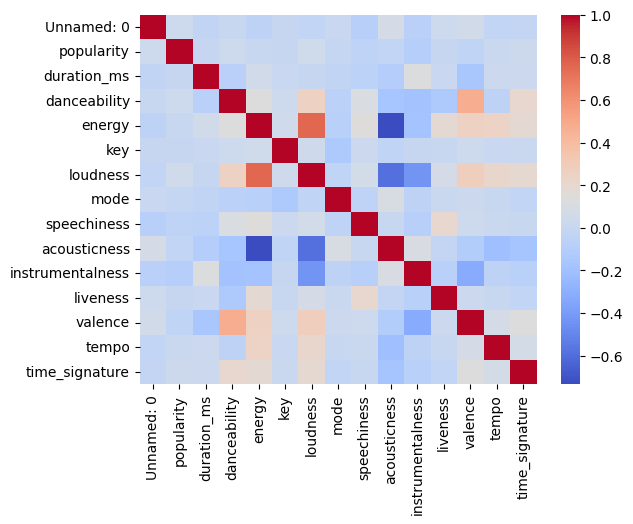

In [9]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [10]:
popularity_duration_corr = correlation_matrix.loc['popularity', 'duration_ms']
print(f"Корреляция между популярностью и длительностью трека: {popularity_duration_corr}")

Корреляция между популярностью и длительностью трека: -0.007101208619703797


#### Заметим, что значимых корреляций, помимо "энергии" и "шумности" не обнаружено

### Гистограмма:


In [11]:
soundframe['duration_sec'] = soundframe['duration_ms'] / 10000

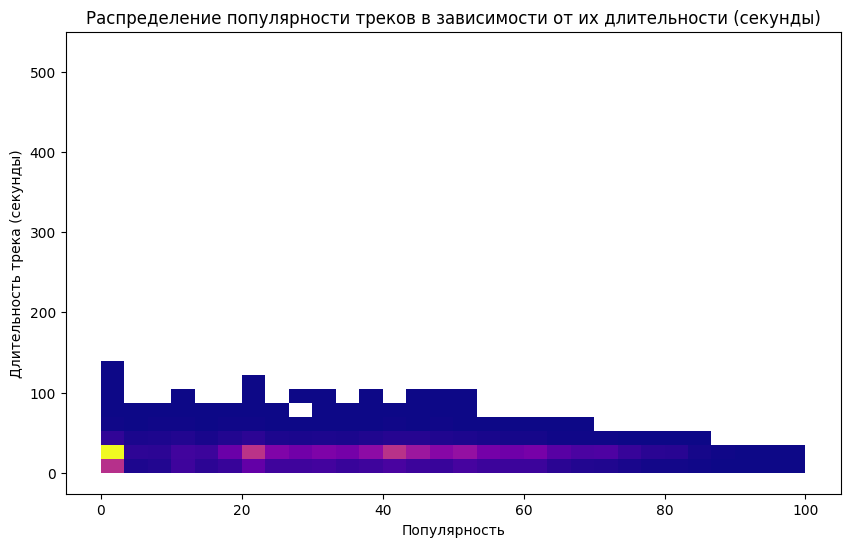

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=soundframe, y='duration_sec', x='popularity', bins=30, pthresh=0.001, cmap='plasma')
plt.title('Распределение популярности треков в зависимости от их длительности (секунды)')
plt.ylabel('Длительность трека (секунды)')
plt.xlabel('Популярность')
plt.show()

### Преобразуем значения к ONE HOT ENCODING


In [13]:
encoder = OneHotEncoder()
soundframe['track_genre']

0            acoustic
1            acoustic
2            acoustic
3            acoustic
4            acoustic
             ...     
113995    world-music
113996    world-music
113997    world-music
113998    world-music
113999    world-music
Name: track_genre, Length: 114000, dtype: object

In [16]:
one_hot_encoded = encoder.fit_transform(soundframe[['track_genre']])

In [22]:
dense_matrix = one_hot_encoded.toarray()
one_hot_vectors = [list(vector) for vector in dense_matrix]
soundframe['genre'] = one_hot_vectors

In [23]:
soundframe['genre']

0         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                                ...                        
113995    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
113996    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
113997    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
113998    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
113999    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: genre, Length: 114000, dtype: object

### Гипотеза: независимо от исполнителя, названия трека сочетание определенных измеримых математических параметров позволит предсказывать будущую популярность трека определенного жанра

#### Поделим на обучающие данные

In [28]:
train_sounds, test_sounds = train_test_split(soundframe, test_size=0.5, stratify=soundframe['genre'], random_state=42)

In [30]:
train_sounds.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec,genre
91550,91550,0nLiqZ6A27jJri2VCalIUs,Metallica,Metallica,Nothing Else Matters,80,388266,False,0.553,0.362,...,0.0263,0.04580,0.000006,0.075,0.158,142.352,3,rock,38.8266,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
58370,58370,3EgDukSjCRfvnLzN9EfFih,Mushroomhead,XX,Empty Spaces,25,111933,False,0.302,0.772,...,0.0646,0.00342,0.922000,0.437,0.270,106.396,4,industrial,11.1933,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
92087,92087,3ESHDbkl1jpdrhrl5EKiEy,Brenda Lee,Home For Christmas 2022,Rockin' Around The Christmas Tree,0,123453,False,0.631,0.569,...,0.0438,0.72800,0.000000,0.270,0.874,71.078,4,rockabilly,12.3453,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
